In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(".//dataset//data.csv")
ids = df.pop('id')
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [3]:
ids

0            0
1            1
2            2
3            3
4            4
         ...  
97995    97995
97996    97996
97997    97997
97998    97998
97999    97999
Name: id, Length: 98000, dtype: int64

In [4]:
df.shape

(98000, 29)

Text(0, 0.5, 'f_01')

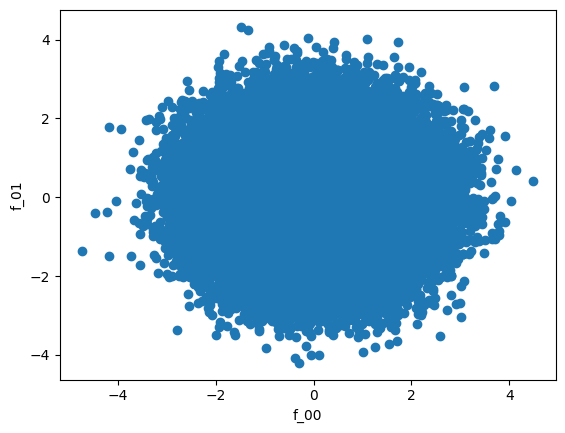

In [5]:
plt.scatter(df.f_00,df.f_01)
plt.xlabel('f_00')
plt.ylabel('f_01')

### scale data with 3 scalers see which one is better

In [6]:
df_minmax = df.copy()
df_standard = df.copy()
df_robust = df.copy()

In [7]:
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()
scaler_robust =RobustScaler()

In [8]:
def scale(dataframe,scaler):
    for col in dataframe.columns:
        dataframe[col] = scaler.fit_transform(dataframe[[col]])
    return 'done'

In [9]:
scale(df_minmax,scaler_minmax)

'done'

In [10]:
scale(df_standard,scaler_standard)

'done'

In [11]:
scale(df_robust,scaler_robust)

'done'

## now plot elbow for each scaler

### 1. min-max scaler

In [12]:
sse_minmax = []
k_rng = range(3,14)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_minmax)
    sse_minmax.append(km.inertia_)

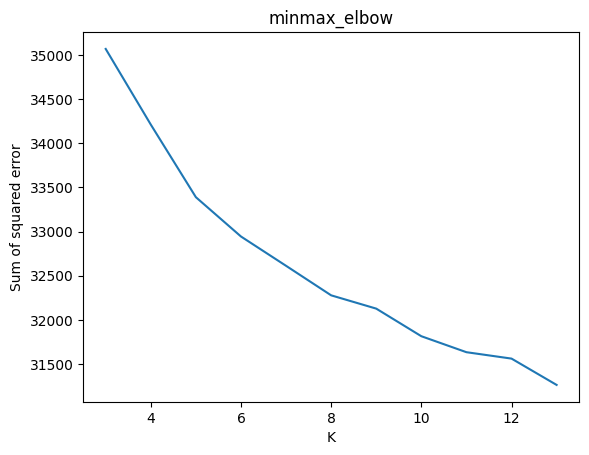

In [13]:
plt.title('minmax_elbow')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_minmax)

In [14]:
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
import umap

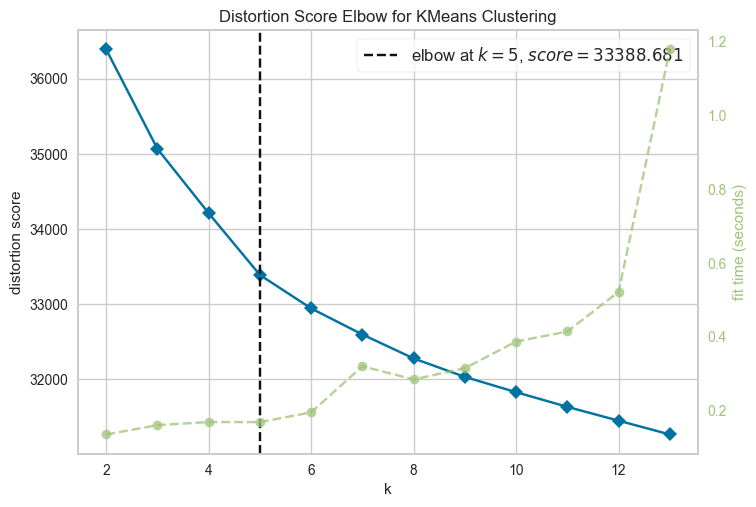

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [15]:
model_minmax = KMeans()
visualizer_minmax = KElbowVisualizer(model_minmax, k=(2,14))

visualizer_minmax.fit(df_minmax)
visualizer_minmax.show()

#### best cluster size is 5

### 2. standard scaler

In [16]:
sse_standard = []
k_rng = range(3,14)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_standard)
    sse_standard.append(km.inertia_)

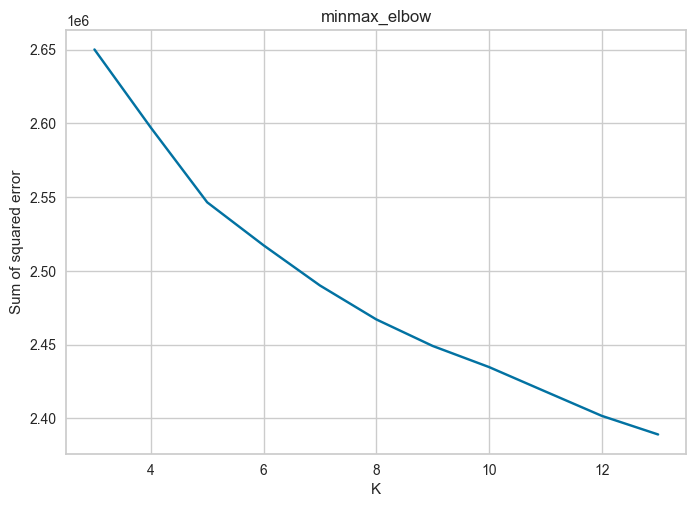

In [17]:
plt.title('minmax_elbow')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_standard)

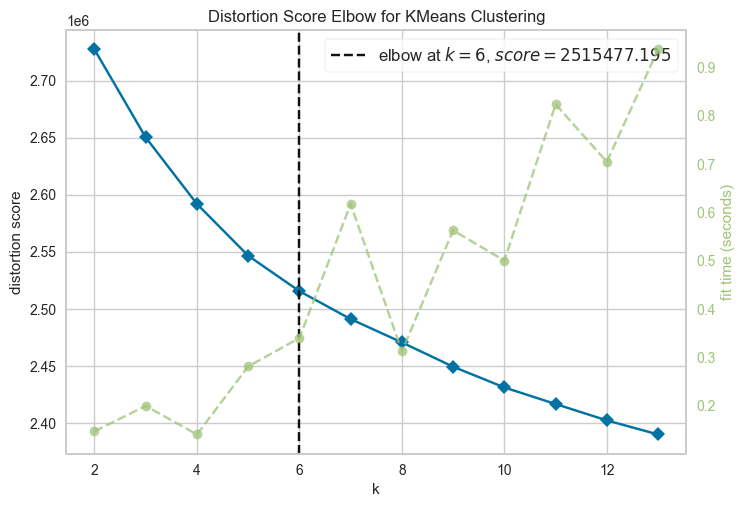

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
model_minmax = KMeans()
visualizer_minmax = KElbowVisualizer(model_minmax, k=(2,14))

visualizer_minmax.fit(df_standard)
visualizer_minmax.show()

#### in standard scale best cluster size is 6

### 3. robust scaler

In [19]:
sse_robust = []
k_rng = range(3,14)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_robust)
    sse_robust.append(km.inertia_)

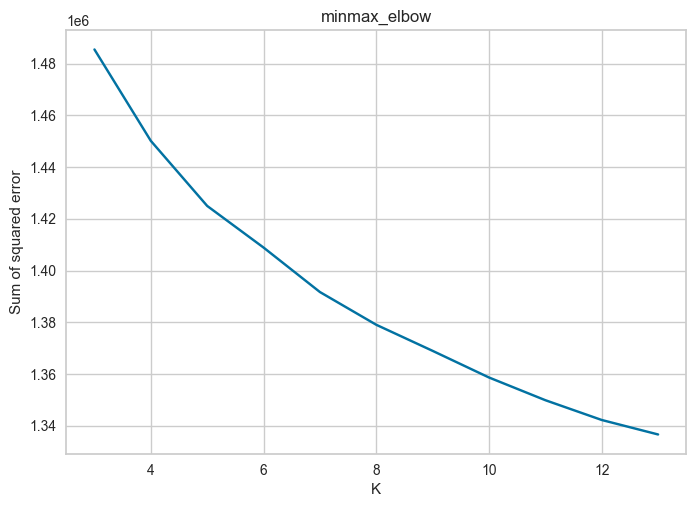

In [20]:
plt.title('minmax_elbow')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_robust)

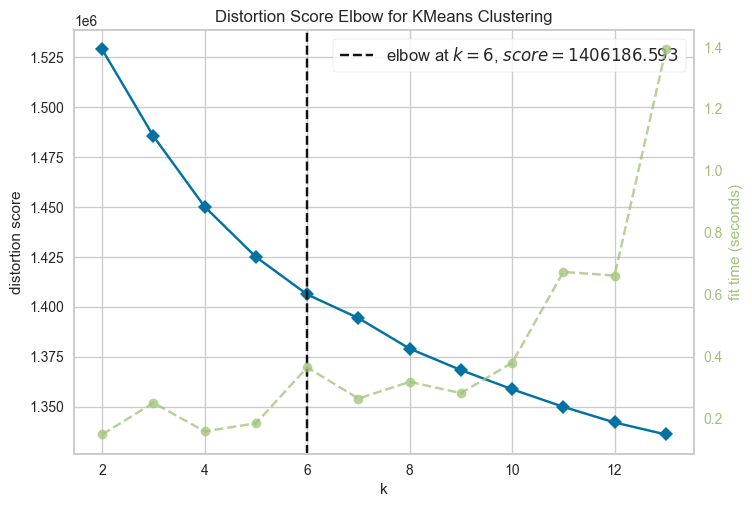

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
model_minmax = KMeans()
visualizer_minmax = KElbowVisualizer(model_minmax, k=(2,14))

visualizer_minmax.fit(df_robust)
visualizer_minmax.show()

#### in robust scale best cluster size is 6

## predict the clusters

#### min-max scale

In [22]:
km_minmax = KMeans(n_clusters=5)
km_minmax.fit(df_minmax)
y_predicted_minmax = km_minmax.predict(df_minmax)
y_predicted_minmax

array([4, 0, 4, ..., 2, 1, 4])

In [23]:
um_minmax = umap.UMAP(n_components=2)
x_minmax = df_minmax.copy()
components_umap_minmax = um_minmax.fit_transform(x_minmax)
projection_2d_minmax = pd.DataFrame({"x" : components_umap_minmax[:,0], "y" : components_umap_minmax[:,1], "clusters" : y_predicted_minmax})

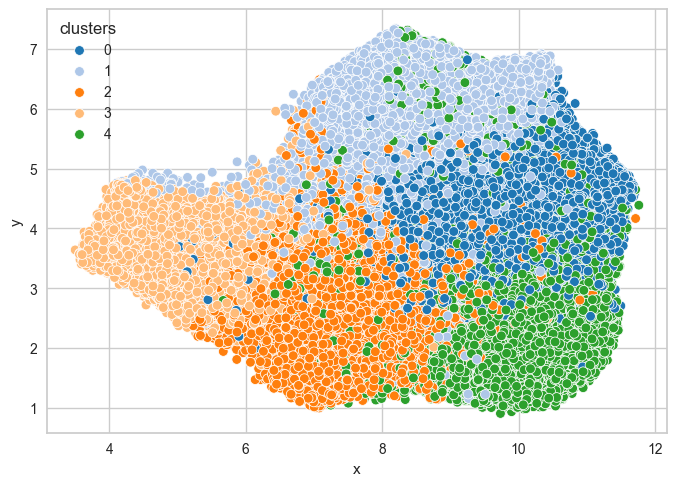

In [24]:
plt.figure()
sns.scatterplot(data = projection_2d_minmax, x = 'x', y = 'y', hue = 'clusters', palette = 'tab20')
plt.show()

#### standard scale

In [25]:
km_standard = KMeans(n_clusters=6)
km_standard.fit(df_standard)
y_predicted_standard = km_standard.predict(df_standard)
y_predicted_standard

array([0, 3, 0, ..., 1, 4, 0])

In [26]:
um_standard = umap.UMAP(n_components=2)
x_standard = df_standard.copy()
components_umap_standard = um_standard.fit_transform(x_standard)
projection_2d_standard = pd.DataFrame({"x" : components_umap_standard[:,0], "y" : components_umap_standard[:,1], "clusters" : y_predicted_standard})

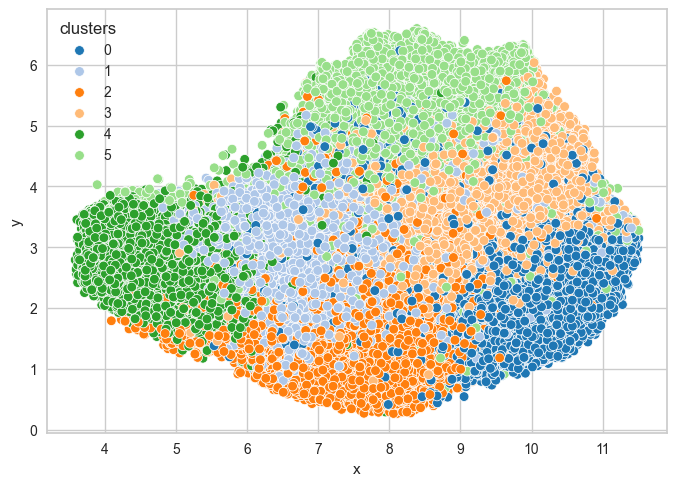

In [27]:
plt.figure()
sns.scatterplot(data = projection_2d_standard, x = 'x', y = 'y', hue = 'clusters', palette = 'tab20')
plt.show()

#### robust scale

In [28]:
km_robust = KMeans(n_clusters=6)
km_robust.fit(df_robust)
y_predicted_robust = km_standard.predict(df_robust)
y_predicted_robust

array([0, 3, 0, ..., 1, 5, 0])

In [29]:
um_robust = umap.UMAP(n_components=2)
x_robust = df_robust.copy()
components_umap_robust = um_robust.fit_transform(x_robust)
projection_2d_robust = pd.DataFrame({"x" : components_umap_standard[:,0], "y" : components_umap_standard[:,1], "clusters" : y_predicted_robust})

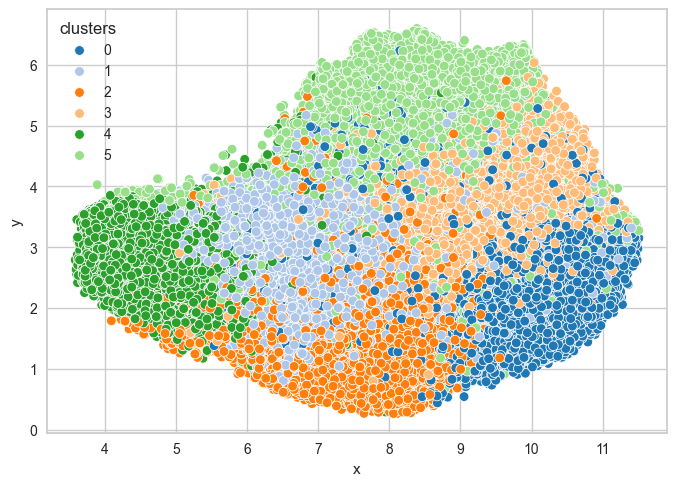

In [30]:
plt.figure()
sns.scatterplot(data = projection_2d_robust, x = 'x', y = 'y', hue = 'clusters', palette = 'tab20')
plt.show()

## submiting the results

In [31]:
submission_minmax = pd.DataFrame({'Id': ids, 'Predicted': y_predicted_minmax})
submission_minmax.to_csv('submission_minmax.csv', index=False)

In [32]:
submission_standard = pd.DataFrame({'Id': ids, 'Predicted': y_predicted_standard})
submission_standard.to_csv('submission_standard.csv', index=False)

In [33]:
submission_robust = pd.DataFrame({'Id': ids, 'Predicted': y_predicted_robust})
submission_robust.to_csv('submission_robust.csv', index=False)